In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import ppscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import random
random.seed(7)
np.random.seed(7)

TINY_FONT_SIZE = 10
SMALL_FONT_SIZE = 12
MEDIUM_FONT_SIZE = 14
BIGGER_FONT_SIZE = 18
HUGE_FONT_SIZE = 24

plt.rc('font', size=TINY_FONT_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=HUGE_FONT_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_FONT_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_FONT_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_FONT_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_FONT_SIZE)  # fontsize of the figure title

Загрузка данных и анализ

In [3]:
train_data = pd.read_csv('train.csv', sep=',', encoding='UTF-8')
test_data = pd.read_csv('test.csv', sep=',', encoding='UTF-8')

In [4]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


'SalePrice' - целевая переменная

In [6]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train_data_len = len(train_data)
test_data_len = len(test_data)
y = train_data['SalePrice'].values
X = train_data.drop(columns = ['SalePrice', 'Id'])
X_to_predict = test_data.drop(columns = ['Id'])
df = X.append(X_to_predict, ignore_index=True)

In [8]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


*Данные имеют 80 признаков, некоторые из которых содержат пропущенные значения. Данные с ответами и без поделены почти поровну, 1460 и 1459 записей соответственно.*

Для начала посмотрим на матрицу корреляции признаков между собой


In [9]:
corr = train_data.drop(columns = ['Id']).corr()

Text(0.5, 1.0, 'correlation')

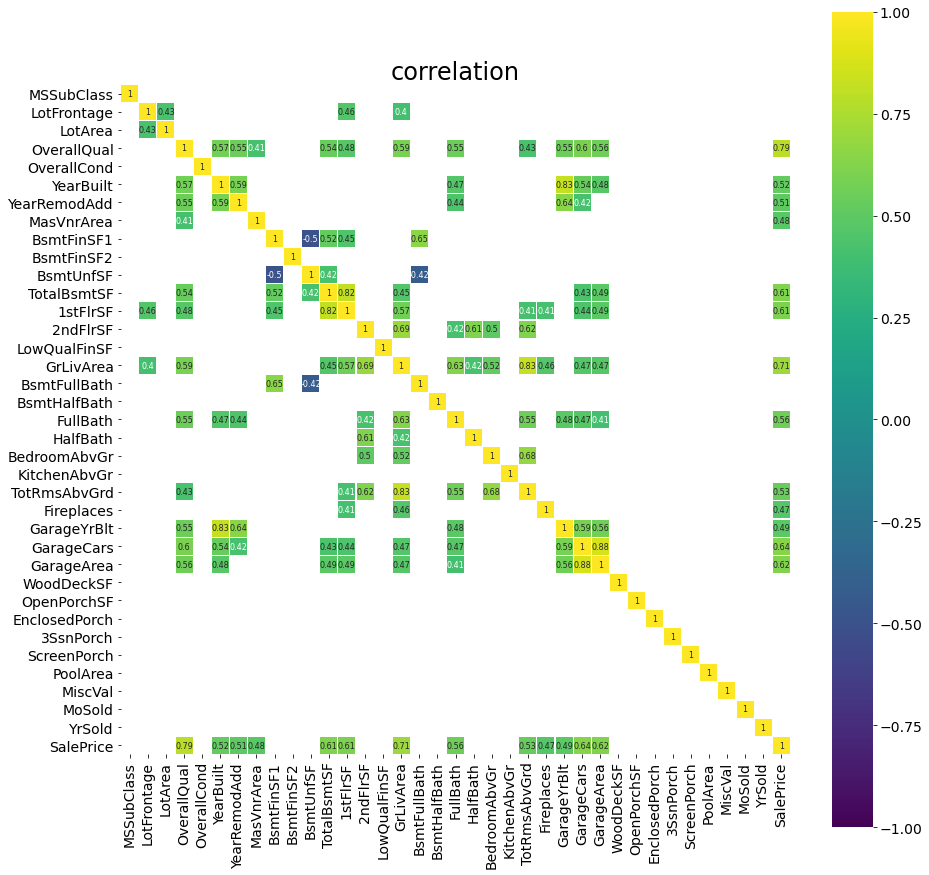

In [10]:
plt.figure(figsize = (15,15))
sns.heatmap(corr[(corr > 0.4) | (corr < -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.title('correlation')

Text(0.5, 1.0, 'correlation')

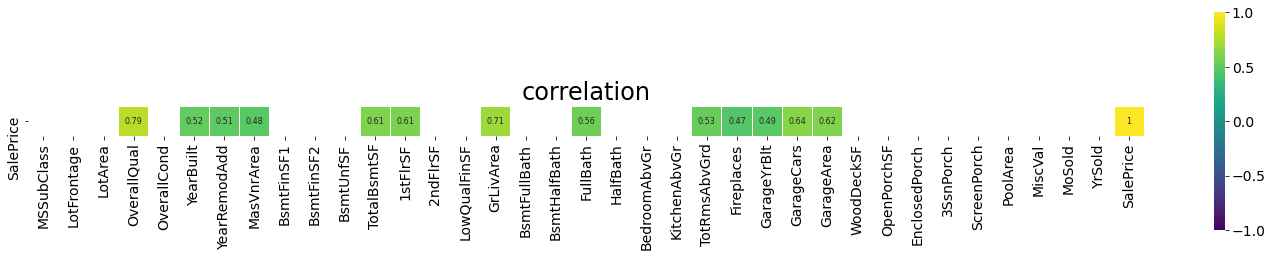

In [11]:
# Особенно внимательно посмотрим на корреляцию признаков с целевой переменной
corr = train_data.drop(columns='Id').corr().tail(1)
plt.figure(figsize=(25, 4))

sns.heatmap(corr[(corr > 0.4) | (corr < -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.title("correlation")

In [12]:
#Наиболее сильно коррелируют с целевым признаком следующие признаки:
corr[(corr > 0.4) | (corr < -0.4)].dropna(axis = 1)

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
SalePrice,0.790982,0.522897,0.507101,0.477493,0.613581,0.605852,0.708624,0.560664,0.533723,0.466929,0.486362,0.640409,0.623431,1.0


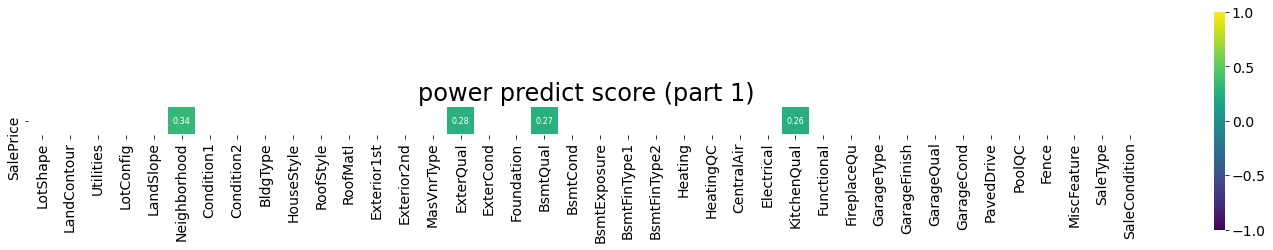

In [13]:
# Также стоит посмотреть на предсказательные способности признаков
pps = corr
for col in train_data.drop(columns='Id').columns:
    score = ppscore.score(train_data, col, 'SalePrice')['ppscore']
    pps[col] = score if abs(score) > 0.2 else np.nan

plt.figure(figsize=(25, 4))
sns.heatmap(pps.iloc[:, pps.shape[1] // 2:],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.title("power predict score (part 1)");

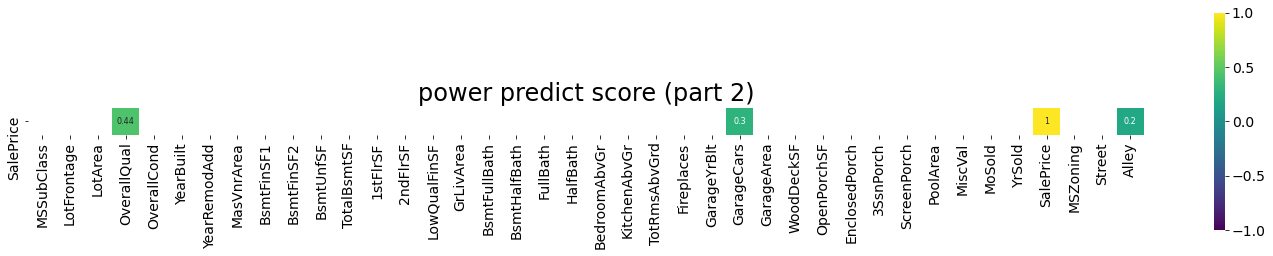

In [14]:
for col in train_data.drop(columns='Id').columns:
    score = ppscore.score(train_data, col, 'SalePrice')['ppscore']
    pps[col] = score if abs(score) > 0.2 else np.nan

plt.figure(figsize=(25, 4))
sns.heatmap(pps.iloc[:, :pps.shape[1] // 2],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.title("power predict score (part 2)");

In [15]:
pps.dropna(axis=1)

,OverallQual,GarageCars,SalePrice,Alley,Neighborhood,ExterQual,BsmtQual,KitchenQual
SalePrice,0.440962,0.296431,1,0.203,0.34094,0.276635,0.269224,0.261966


*OverallQual¶*

OverallQual оценивает общий материал и отделку дома, где значения признака означают:

10 - Превосходно
9 - Отлично
8 - Очень хорошо
7 - Хорошо
6 - Выше среднего
5 - Средние
4 - Ниже среднего
3 - Плохо
2 - Очень плохо
1 - Ужасно

<AxesSubplot:xlabel='OverallQual', ylabel='Density'>

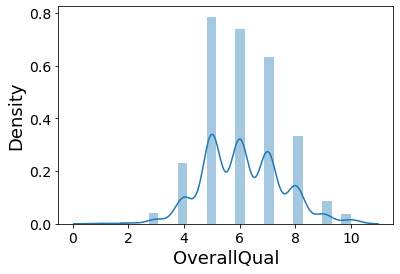

In [16]:
sns.distplot(train_data['OverallQual'])

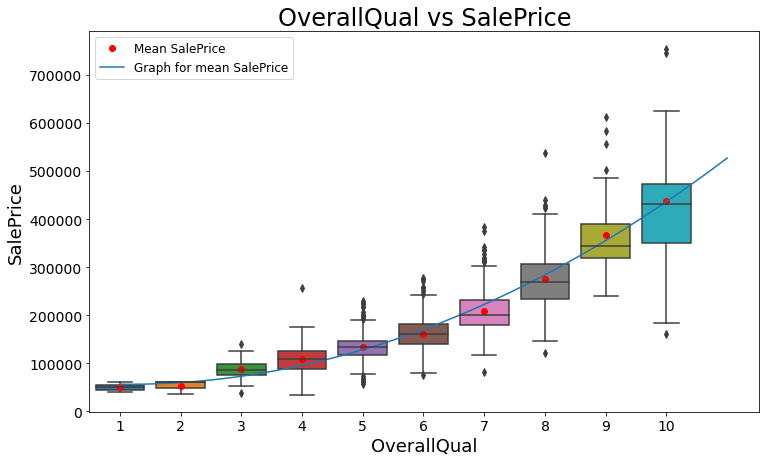

In [17]:
plt.subplots(figsize=(12, 7))
sns.boxplot(x=train_data['OverallQual'], y=train_data['SalePrice'])
plt.title('OverallQual vs SalePrice')

x_dot = list(range(0, 10))
y_dot = []
tmp = train_data[['OverallQual', 'SalePrice']]
for i in range(1, 11):
    y_dot.append(tmp[tmp['OverallQual'] == i].mean()[1])

x = np.linspace(0, 10, 1000)
y_poly = np.polyval(np.polyfit(x_dot, y_dot, 2), x)

plt.plot(x_dot, y_dot, "ro", label="Mean SalePrice")
plt.plot(x, y_poly, label="Graph for mean SalePrice")
plt.legend();

Чем лучше отделка дома, тем он дороже, что более чем логично. Можно обратить внимание, что данный признак имеет множество выбросов, которые удалять мы не будем.


*GrLivArea* 

GrLivArea - надземная жилая площадь квадратных футов.

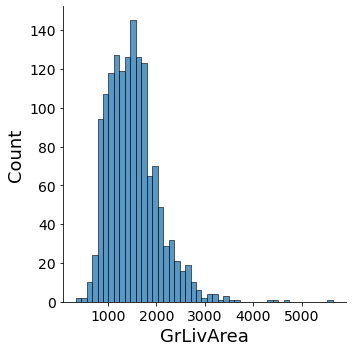

In [18]:


sns.displot(train_data['GrLivArea'])

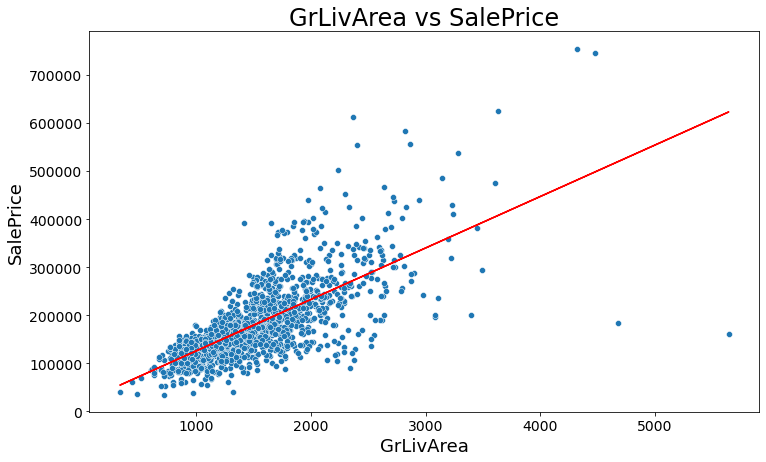

In [19]:
plt.subplots(figsize=(12, 7))
plt.title('GrLivArea vs SalePrice')
sns.scatterplot(x=train_data['GrLivArea'], y=train_data['SalePrice'])

lr = LinearRegression()
lr.fit(np.array(train_data['GrLivArea']).reshape(-1,1), train_data['SalePrice'])
plt.plot(train_data['GrLivArea'], lr.predict(np.array(train_data['GrLivArea']).reshape(-1,1)), 'red')


Обычно чем больше надземная жилая площадь, тем и больше значение целевого признака. Данный признак также имеет некоторые выбросы


*GarageCars¶*
GarageCars - размер гаража.

<AxesSubplot:xlabel='GarageCars', ylabel='Density'>

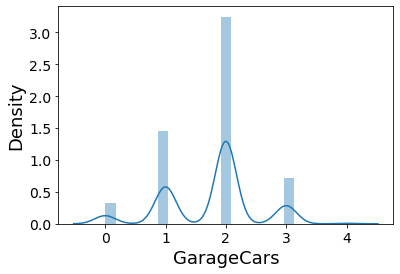

In [20]:
sns.distplot(train_data['GarageCars'])


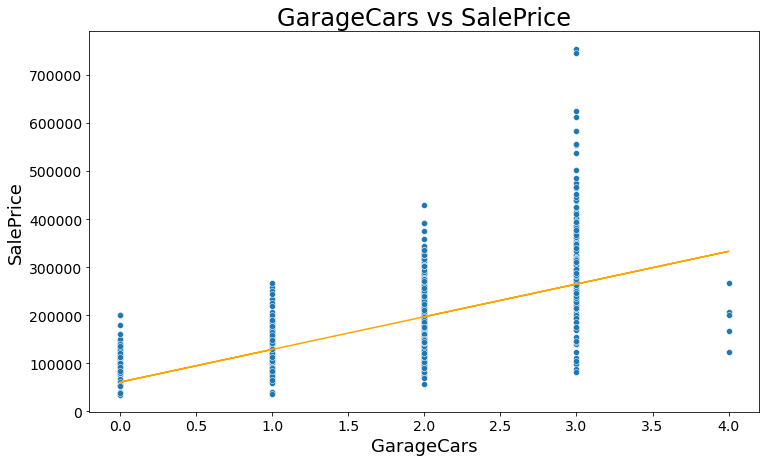

In [21]:
plt.subplots(figsize=(12, 7))
plt.title('GarageCars vs SalePrice')
sns.scatterplot(x=train_data['GarageCars'], y=train_data['SalePrice'])

lr = LinearRegression()
lr.fit(np.array(train_data['GarageCars']).reshape(-1, 1), train_data['SalePrice'])
plt.plot(train_data['GarageCars'], lr.predict(np.array(train_data['GarageCars']).reshape(-1, 1)), 'orange');

Также наблюдается некая зависимость между данным признаком и целевым признаком. Приступим наконец к обработке данных

In [22]:
# Пропущенные значения
total = df.isnull().sum().sort_values(ascending=False)
percent_na = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
data_na = pd.concat([total, percent_na], axis=1, keys=['Total', 'Percent'])
data_na[data_na['Total'] > 0]

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageCond,159,0.054471


Важно заметить, что для некоторых признаков отсутствующее значение имеет вполне определённый смысл, который описан в файле data_descriotion.txt.

Пропущенные значения, имеющие семантическое значение
Изучая описание датасета, можно узнать о том, что пропущенные значения для некоторых признаков имеют вполне чёткое смысловое значение, а именно означают отсутствие того или иного элемента дома.

Вот эти признаки:

PoolQC
MiscFeature
Alley
Fence
FireplaceQu
GarageCond
GarageQual
GarageFinish
GarageType
BsmtCond
BsmtExposure
BsmtQual
BsmtFinType2
BsmtFinType1
Например, пропущенные значения для признака PoolQC означают отсутствие бассейна, для BsmtFinType2 означают отсутствие подвала и т.д.

Заполним пропущенные значения для данных категориальных признаков значеним 'Absent'.

Отсутствующие значения у признаков GarageCond, GarageQual, GarageFinish, GarageType обозначают одно и тоже — отсутствие гаража. Интересно, что GarageCond, GarageQual, GarageFinish отсутствующих значений 159, а у GarageType 157 значений.

In [23]:
features = ['GarageCond', 'GarageQual', 'GarageFinish', 'GarageType', 'GarageArea', 'GarageCars']
piece_df = df[features]

In [24]:
set(piece_df[df['GarageFinish'].isna()].index) - set(piece_df[df['GarageType'].isna()].index)

{2126, 2576}

In [25]:
piece_df.iloc[2126, :]

GarageCond         NaN
GarageQual         NaN
GarageFinish       NaN
GarageType      Detchd
GarageArea       360.0
GarageCars         1.0
Name: 2126, dtype: object

In [26]:
piece_df.iloc[2576, :]

GarageCond         NaN
GarageQual         NaN
GarageFinish       NaN
GarageType      Detchd
GarageArea         NaN
GarageCars         NaN
Name: 2576, dtype: object

датасете test.cvs имеются два объекта, которые, судя по другим признакам, не имеют гаража, но по признаку GarageType имеют гараж, причём гараж отдельно от дома. Для всех остальных объектов, у которых гараж также отдельно от дома, признаки GarageCond, GarageQual, GarageFinish имеют заполненные значения.

Это ни на что особо не повлияет, поэтому начнём заполнять пропущенные значения.


In [27]:
features = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
    'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
    'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1'
]

In [28]:
df.loc[:, features] = df.loc[:, features].fillna('Absent')
df.loc[:, features]

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,GarageCond,GarageQual,GarageFinish,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,BsmtFinType1
0,Absent,Absent,Absent,Absent,Absent,TA,TA,RFn,Attchd,TA,No,Gd,Unf,GLQ
1,Absent,Absent,Absent,Absent,TA,TA,TA,RFn,Attchd,TA,Gd,Gd,Unf,ALQ
2,Absent,Absent,Absent,Absent,TA,TA,TA,RFn,Attchd,TA,Mn,Gd,Unf,GLQ
3,Absent,Absent,Absent,Absent,Gd,TA,TA,Unf,Detchd,Gd,No,TA,Unf,ALQ
4,Absent,Absent,Absent,Absent,TA,TA,TA,RFn,Attchd,TA,Av,Gd,Unf,GLQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,TA,No,TA,Unf,Unf
2915,Absent,Absent,Absent,Absent,Absent,TA,TA,Unf,CarPort,TA,No,TA,Unf,Rec
2916,Absent,Absent,Absent,Absent,TA,TA,TA,Unf,Detchd,TA,No,TA,Unf,ALQ
2917,Absent,Shed,Absent,MnPrv,Absent,Absent,Absent,Absent,Absent,TA,Av,Gd,Unf,GLQ


Пропущенные значения


In [29]:
total = df.isnull().sum().sort_values(ascending=False)
percent_na = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
data_na = pd.concat([total, percent_na], axis=1, keys=['Total', 'Percent'])
data_na[data_na['Total'] > 0]

,Total,Percent
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
MasVnrType,24,0.008222
MasVnrArea,23,0.007879
MSZoning,4,0.001370
BsmtHalfBath,2,0.000685
Functional,2,0.000685
BsmtFullBath,2,0.000685
Utilities,2,0.000685
Exterior2nd,1,0.000343


Остальные пропущенные значения
Остальные пропущенные значения являются именно пропущенными, неизвестными, поэтому нужно аккуратно и вдумчиво подходить к каждому признаку и заполнять неизвестные значения.

Оставшиеся признаки с неизвестными значениями:

LotFrontage
GarageYrBlt
MasVnrType
MasVnrArea
MSZoning
BsmtHalfBath
Utilities
Functional
BsmtFullBath
BsmtFinSF2
BsmtFinSF1
BsmtUnfSF
TotalBsmtSF
Exterior1st
Exterior2nd
SaleType
Electrical
KitchenQual
GarageArea
GarageCars


#### *LotFrontage*
LotFrontage — длина фасада в футах.

Заполним пропущенные значения при помощи медианы LotFrontage домов, с одного района.

In [30]:
df.groupby("Neighborhood")["LotFrontage"]


In [31]:
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

#### *GarageYrBlt, GarageArea, GarageCars*
GarageYrBlt, GarageArea, GarageCars — год постройки, площадь и размер гаража соответственно.

Можно заметить, что год постройки гаража отсутствует только у тех объектов, у которых отсутствует гараж как таковой. Возможно, в таком случае пропущенные значения стоит заменить на -1.

In [32]:
df['GarageYrBlt'].fillna(-1, inplace=True)

Что насчёт GarageArea, GarageCars? Как мы видим, значения отсутствуют только у одного объекта - 2576 объекта.

Как писалось выше, данный объект исходя из признака GarageType имеет гараж, причём гараж отдельно от дома, а исходя из GarageCond, GarageQual и GarageFinish гараж отсутствует. Таким образом, заполним данные поля просто нулями

In [33]:
df[piece_df['GarageCars'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2576,70,RM,50.0,9060,Pave,Absent,Reg,Lvl,AllPub,Inside,...,0,0,Absent,MnPrv,Absent,0,3,2007,WD,Alloca


In [34]:
df['GarageArea'].fillna(0, inplace=True)

In [35]:
df['GarageCars'].fillna(0, inplace=True)


MasVnrType, MasVnrArea
MasVnrType, MasVnrArea — тип и площадь каменной кладки соответственно.

Можно предположить, что отсутствующие значения, по крайней мере в большинстве случаев, будут обозначать отсутствие каменной кладки.

In [36]:
df['MasVnrType'].fillna('None', inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)

#### *MSZoning*
MSZoning - общая классификация продажи.

Ничего больше не остаётся, кроме как заполнить самым популярным значением.


In [37]:
df['MSZoning'].fillna(df['MSZoning'].mode()[0], inplace=True)

#### *Utilities*
Utilities — тип доступных коммунальных услуг.

Почти все значения для данного признака являются AllPub, значит этот признак можно смело удалять.

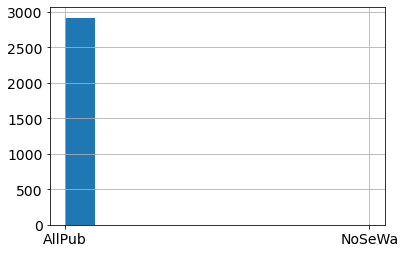

In [38]:
df['Utilities'].hist();

In [39]:
df.drop(columns = ['Utilities'], inplace = True)

#### *Functional*
Описание датасета предполагает, что отсутствующие значения являются значением Typ.

In [40]:
df['Functional'].fillna('Typ', inplace = True)

#### *BsmtHalfBath, BsmtFullBath, BsmtFinSF2, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF*
Исходя из описания датасета можно предположить, что отсутствующие значения, по крайней мере в большинстве случаев, у тех объектов, у которых отсутствует как таковой, например, подвал.

Соответственно, заполним категориальные признаки значением 'Absent', а числовые нулями.#

In [41]:
features = ['BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF']

In [42]:
features = [
    'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2'
]

df.loc[:, features] = df.loc[:, features].fillna('Absent')

features = [
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'
]

df.loc[:, features] = df.loc[:, features].fillna(0)

#### *Exterior1st, Exterior2nd*
Exterior1st, Exterior2nd — наружнее покрытие дома, первый и второй материал соответственно.

Имеют по одному пропущенному значению каждый. Можно просто подставить самое популярное значение.

In [43]:
df['Exterior1st'].fillna(df['Exterior1st'].mode()[0], inplace = True)
df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0], inplace = True)

#### *SaleType, Electrical, KitchenQual*
SaleType, Electrical, KitchenQual - тип продажи, электрическая система и качество кухни соответственно.

Данные признаки также имеют по одному пропущенному значению и также заполним их самыми популярными значениями

In [44]:
df['SaleType'].fillna(df['SaleType'].mode()[0], inplace = True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace = True)
df['KitchenQual'].fillna(df['KitchenQual'].mode()[0], inplace = True)

In [45]:
# Пропущенные значения отсутствуют, ура

In [46]:
total = df.isnull().sum().sort_values(ascending=False)
percent_na = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
data_na = pd.concat([total, percent_na], axis=1, keys=['Total', 'Percent'])
data_na[data_na['Total'] > 0]

,Total,Percent


### Обработка признаков

Исходя из описания датасета, есть один целочисленный признак, который является на самом деле категориальным и числами кодирует некоторые категории.

Преобразуем его к строковому типу для последующего бинарного кодирования.

In [47]:
df['MSSubClass']

0        60
1        20
2        60
3        70
4        60
       ... 
2914    160
2915    160
2916     20
2917     85
2918     60
Name: MSSubClass, Length: 2919, dtype: int64

In [48]:
df['MSSubClass'] = df['MSSubClass'].apply(str)

In [49]:
features = [
    'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual'
]

for feature in features:
    df[feature].replace(['Po'], 0, inplace=True)
    df[feature].replace(['Fa'], 1, inplace=True)
    df[feature].replace(['TA'], 2, inplace=True)
    df[feature].replace(['Gd'], 3, inplace=True)
    df[feature].replace(['Ex'], 4, inplace=True)

features = [
    'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'FireplaceQu', 'PoolQC'
]

for feature in features:
    df[feature].replace(['Absent'], 0, inplace=True)
    df[feature].replace(['Po'], 1, inplace=True)
    df[feature].replace(['Fa'], 2, inplace=True)
    df[feature].replace(['TA'], 3, inplace=True)
    df[feature].replace(['Gd'], 4, inplace=True)
    df[feature].replace(['Ex'], 5, inplace=True)

features = [
    'BsmtFinType1', 'BsmtFinType2'
]

for feature in features:
    df[feature].replace(['Absent'], 0, inplace=True)
    df[feature].replace(['Unf'], 1, inplace=True)
    df[feature].replace(['LwQ'], 2, inplace=True)
    df[feature].replace(['Rec'], 3, inplace=True)
    df[feature].replace(['BLQ'], 4, inplace=True)
    df[feature].replace(['ALQ'], 5, inplace=True)
    df[feature].replace(['GLQ'], 6, inplace=True)

df['Functional'].replace(['Sal'], 0, inplace=True)
df['Functional'].replace(['Sev'], 1, inplace=True)
df['Functional'].replace(['Maj2'], 2, inplace=True)
df['Functional'].replace(['Maj1'], 3, inplace=True)
df['Functional'].replace(['Mod'], 4, inplace=True)
df['Functional'].replace(['Min2'], 5, inplace=True)
df['Functional'].replace(['Min1'], 6, inplace=True)
df['Functional'].replace(['Typ'], 7, inplace=True)

df['BsmtExposure'].replace(['Absent'], 0, inplace=True)
df['BsmtExposure'].replace(['No'], 1, inplace=True)
df['BsmtExposure'].replace(['Mn'], 2, inplace=True)
df['BsmtExposure'].replace(['Av'], 3, inplace=True)
df['BsmtExposure'].replace(['Gd'], 4, inplace=True)

df['LotShape'].replace(['IR3'], 0, inplace=True)
df['LotShape'].replace(['IR2'], 1, inplace=True)
df['LotShape'].replace(['IR1'], 2, inplace=True)
df['LotShape'].replace(['Reg'], 3, inplace=True)

df['LandContour'].replace(['Low'], 0, inplace=True)
df['LandContour'].replace(['HLS'], 1, inplace=True)
df['LandContour'].replace(['Bnk'], 2, inplace=True)
df['LandContour'].replace(['Lvl'], 3, inplace=True)

df['LandSlope'].replace(['Sev'], 0, inplace=True)
df['LandSlope'].replace(['Mod'], 1, inplace=True)
df['LandSlope'].replace(['Gtl'], 2, inplace=True)

df['CentralAir'].replace(['N'], 0, inplace=True)
df['CentralAir'].replace(['Y'], 1, inplace=True)

df['GarageType'].replace(['Absent'], 0, inplace=True)
df['GarageType'].replace(['Detchd'], 1, inplace=True)
df['GarageType'].replace(['CarPort'], 2, inplace=True)
df['GarageType'].replace(['BuiltIn'], 3, inplace=True)
df['GarageType'].replace(['Basment'], 4, inplace=True)
df['GarageType'].replace(['Attchd'], 5, inplace=True)
df['GarageType'].replace(['2Types'], 6, inplace=True)

df['GarageType'].replace(['Absent'], 0, inplace=True)
df['GarageType'].replace(['Unf'], 1, inplace=True)
df['GarageType'].replace(['RFn'], 2, inplace=True)
df['GarageType'].replace(['Fin'], 3, inplace=True)

df['PavedDrive'].replace(['N'], 0, inplace=True)
df['PavedDrive'].replace(['P'], 1, inplace=True)
df['PavedDrive'].replace(['Y'], 2, inplace=True)

df['Fence'].replace(['Absent'], 0, inplace=True)
df['Fence'].replace(['MnWw'], 1, inplace=True)
df['Fence'].replace(['GdWo'], 2, inplace=True)
df['Fence'].replace(['MnPrv'], 3, inplace=True)
df['Fence'].replace(['GdPrv'], 4, inplace=True)

Как можно видеть из визуализаций (и из чистой логики), площадь оказывает очень большой вклад в формирование цены, поэтому добавим некоторые признаки, обобщающие эту характеристику.

In [50]:
df['PoolArea'].astype(bool).value_counts()

False    2906
True       13
Name: PoolArea, dtype: int64

In [51]:
df['TotalSF'] = df['2ndFlrSF'] + df['1stFlrSF'] + df['TotalBsmtSF']
#  Большие ванные комнаты будем счищать за 2 ванные комнаты
df['TotalBath'] = 2 * (df['FullBath'] + df['BsmtFullBath']) + df['HalfBath'] + df['BsmtHalfBath']
df['TotalPorchSF'] = df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
# Не знаю насколько это поможет, но добавить можно
df['HasPool'] = df['PoolArea'].astype(bool).astype(int)
df['HasGarage'] = df['GarageArea'].astype(bool).astype(int)
df['HasBsmt'] = df['TotalBsmtSF'].astype(bool).astype(int)
df['HasFireplace'] = df['Fireplaces'].astype(bool).astype(int)

### Масштабируем признаки связанные с годами и месяцами.

In [52]:
df['MoSold'] = df['MoSold'] - df['MoSold'].median()
df['YrSold'] = df['YrSold'] - df['YrSold'].median()
df['YearBuilt'] = df['YearBuilt'] - df['YearBuilt'].median()
df['YearRemodAdd'] = df['YearRemodAdd'] - df['YearRemodAdd'].median()
df['GarageYrBlt'] = df['GarageYrBlt'] - df['GarageYrBlt'].median()

In [53]:
#Масштабируем вещественные признаки.

In [54]:
from sklearn.preprocessing import StandardScaler
features = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
    'TotalSF', 'TotalBath', 'TotalPorchSF'
]

In [55]:
sc = StandardScaler()
sc.fit(df[features])

StandardScaler()

In [56]:
df[features]=sc.transform(df[features])
df[features]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,TotalSF,TotalBath,TotalPorchSF
0,-0.209359,-0.217879,0.529034,0.581145,-0.293025,-0.934165,-0.443078,-0.773861,1.207379,-0.101197,...,0.349364,-0.740760,0.200006,-0.359601,-0.103331,-0.285935,-0.06315,0.023003,1.584766,-0.762276
1,0.481900,-0.072044,-0.567016,1.178255,-0.293025,-0.629284,0.477463,0.261075,-0.785025,-0.101197,...,-0.058991,1.614879,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.029172,0.348216,0.719030
2,-0.071107,0.137197,0.338903,0.098189,-0.293025,-0.287999,-0.297968,-0.610718,1.235375,-0.101197,...,0.627787,-0.740760,-0.081209,-0.359601,-0.103331,-0.285935,-0.06315,0.196920,1.584766,-0.881030
3,-0.439779,-0.078385,-0.567016,-0.494529,-0.293025,-0.046824,-0.669812,-0.506205,0.978742,-0.101197,...,0.785561,-0.740760,-0.184815,3.874967,-0.103331,-0.285935,-0.06315,-0.092527,-0.270058,0.775282
4,0.666236,0.518903,1.390216,0.469187,-0.293025,-0.160586,0.212184,-0.037170,1.671651,-0.101197,...,1.685798,0.776967,0.540424,-0.359601,-0.103331,-0.285935,-0.06315,0.988241,1.584766,0.581524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-2.237052,-1.043937,-0.567016,-0.968705,-0.293025,-0.033173,-1.145954,-1.564083,0.488807,-0.101197,...,-2.193574,-0.740760,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-1.129816,-0.888333,-1.143540
2915,-2.237052,-1.049263,-0.567016,-0.415500,-0.293025,-0.606531,-1.145954,-1.564083,0.488807,-0.101197,...,-0.866421,-0.740760,-0.347624,-0.359601,-0.103331,-0.285935,-0.06315,-1.129816,-0.888333,-0.993535
2916,4.168614,1.246808,-0.567016,1.718287,-0.293025,-1.275450,0.391304,0.164209,-0.785025,-0.101197,...,0.479295,3.006130,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.123584,-0.270058,1.819071
2917,-0.347611,0.034605,-0.567016,-0.228904,-0.293025,0.032809,-0.316107,-0.483263,-0.785025,-0.101197,...,-2.193574,-0.108374,-0.229217,-0.359601,-0.103331,-0.285935,-0.06315,-0.826704,-0.888333,-0.443514


In [57]:
#Применим one-hot кодирование к категориальным признакам.

In [58]:
df = pd.get_dummies(df, drop_first = True)

In [59]:
df


,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.209359,-0.217879,3,3,2,7,5,30.0,10.0,0.529034,...,0,0,0,0,1,0,0,0,1,0
1,0.481900,-0.072044,3,3,2,6,8,3.0,-17.0,-0.567016,...,0,0,0,0,1,0,0,0,1,0
2,-0.071107,0.137197,2,3,2,7,5,28.0,9.0,0.338903,...,0,0,0,0,1,0,0,0,1,0
3,-0.439779,-0.078385,2,3,2,7,5,-58.0,-23.0,-0.567016,...,0,0,0,0,1,0,0,0,0,0
4,0.666236,0.518903,2,3,2,8,5,27.0,7.0,1.390216,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-2.237052,-1.043937,3,3,2,4,7,-3.0,-23.0,-0.567016,...,0,0,0,0,1,0,0,0,1,0
2915,-2.237052,-1.049263,3,3,2,4,5,-3.0,-23.0,-0.567016,...,0,0,0,0,1,0,0,0,0,0
2916,4.168614,1.246808,3,3,2,5,7,-13.0,3.0,-0.567016,...,0,0,0,0,1,0,0,0,0,0
2917,-0.347611,0.034605,3,3,2,5,5,19.0,-1.0,-0.567016,...,0,0,0,0,1,0,0,0,1,0


In [60]:
# Обновляем данные для обучения и для предсказания

In [61]:
X = df[:train_data_len]
X_to_predict = df[train_data_len:]

In [62]:
# Разобьём данные на обучение и тест в соотношении 75%\25%

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Работа с моделями
RandomForest
XGBoost
CatBoost
LightGBM

In [64]:
from sklearn.metrics import mean_squared_error as MSE, r2_score as R2, mean_absolute_error as MAE

In [65]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [66]:
df

,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.209359,-0.217879,3,3,2,7,5,30.0,10.0,0.529034,...,0,0,0,0,1,0,0,0,1,0
1,0.481900,-0.072044,3,3,2,6,8,3.0,-17.0,-0.567016,...,0,0,0,0,1,0,0,0,1,0
2,-0.071107,0.137197,2,3,2,7,5,28.0,9.0,0.338903,...,0,0,0,0,1,0,0,0,1,0
3,-0.439779,-0.078385,2,3,2,7,5,-58.0,-23.0,-0.567016,...,0,0,0,0,1,0,0,0,0,0
4,0.666236,0.518903,2,3,2,8,5,27.0,7.0,1.390216,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-2.237052,-1.043937,3,3,2,4,7,-3.0,-23.0,-0.567016,...,0,0,0,0,1,0,0,0,1,0
2915,-2.237052,-1.049263,3,3,2,4,5,-3.0,-23.0,-0.567016,...,0,0,0,0,1,0,0,0,0,0
2916,4.168614,1.246808,3,3,2,5,7,-13.0,3.0,-0.567016,...,0,0,0,0,1,0,0,0,0,0
2917,-0.347611,0.034605,3,3,2,5,5,19.0,-1.0,-0.567016,...,0,0,0,0,1,0,0,0,1,0


### Определение вспомогательных функций

In [67]:
# Создадим папки для предсказаний и моделей
! mkdir ./models && mkdir ./predictions

mkdir: ./models: File exists


In [68]:
plt.rc('xtick', labelsize=SMALL_FONT_SIZE)
plt.rc('ytick', labelsize=SMALL_FONT_SIZE)

In [77]:
def print_metrics(y_true, y_pred):
    print(f'R^2 {R2(y_true, y_pred)}')
    print(f'RMSE {MSE(y_true, y_pred, squared=False)}')
    print(f'MSE {MSE(y_true, y_pred)}')
    print(f'MAE {MAE(y_true, y_pred)}')
          
def plot_y_true_vs_y_pred(y_train, y_test, y_train_pred, y_test_pred, model_name):
    plt.figure(figsize=(16, 6))
    plt.subplot(1,2,1)
    plt.grid(True)
    plt.xlabel(f'Предсказание модели "{model_name}"')
    plt.ylabel('Истинные значения')
    plt.xlim(y_train.min() - y_train.mean() // 3, y_train.max() + y_train.mean() // 3)
    plt.ylim(y_train.min() - y_train.mean() // 3, y_train.max() + y_train.mean() // 3)
    sns.scatterplot(y_train_pred, y_train, alpha=0.5, color='red')
    sns.scatterplot(y_test_pred, y_test, alpha=0.5, color='blue')
    plt.legend
    plt.title(model_name)
          
def write_prediction(model, model_name):
    submission = pd.read_csv('sample_submission.csv')
    submission['SalePrice'] = model.predict(X_to_predict)
    submission.to_csv(f'./predictions/{model_name}.csv', sep=',', encoding='UTF-8', index=False)

models = dict()

Проведя серию экспериментов и подбор гиперпараметров удалось получить данные наилучшие модели.

In [70]:
X_train

,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1288,-1.361457,-0.571179,2,3,2,8,5,27.0,7.0,-0.567016,...,0,0,0,0,1,0,0,0,1,0
1198,0.021061,-0.135450,3,3,2,7,5,28.0,8.0,-0.567016,...,0,0,0,0,1,0,0,0,1,0
1450,-0.439779,-0.148132,3,3,2,5,5,1.0,-19.0,-0.567016,...,0,0,0,0,1,0,0,0,1,0
12,0.113228,0.355061,1,3,2,5,6,-11.0,-31.0,-0.567016,...,0,0,0,0,1,0,0,0,1,0
635,-0.439779,0.092305,3,2,2,6,7,-59.0,2.0,-0.567016,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,-0.255443,-0.314890,2,3,2,6,5,20.0,1.0,0.059298,...,0,0,0,0,1,0,0,0,1,0
1383,0.113228,1.923861,3,3,2,5,7,-55.0,14.0,-0.567016,...,0,0,0,0,1,0,0,0,1,0
93,-0.439779,-0.376395,3,3,2,6,6,-63.0,5.0,-0.567016,...,0,0,0,0,1,0,0,0,1,0
834,0.251480,-0.290796,3,3,2,5,6,-12.0,-32.0,0.193509,...,0,0,0,0,1,0,0,0,1,0


In [71]:
y_train

array([278000, 178000, 136000, ..., 133900, 139950, 207500])

R^2 0.8472973682638582
RMSE 37074.241743926985
MSE 1374499400.8871384
MAE 18587.30090121953
CPU times: user 22.5 s, sys: 136 ms, total: 22.7 s
Wall time: 22.7 s


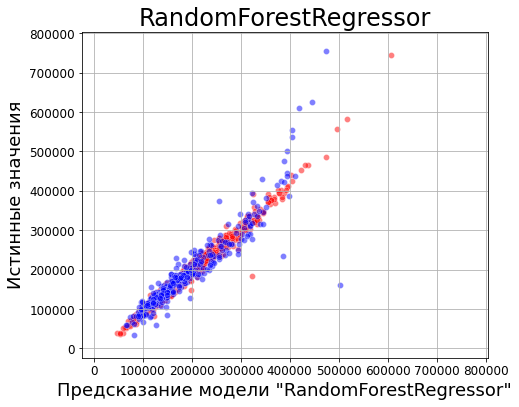

In [72]:
%%time
model_name = 'RandomForestRegressor'
model = RandomForestRegressor(n_estimators=3100, max_features=130,
                              max_depth=10, random_state=7)
model.fit(X_train, y_train)

models[model_name] = model

y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)

print_metrics(y_test, y_test_pred)

plot_y_true_vs_y_pred(y_train, y_test, y_train_pred, y_test_pred, model_name)

In [73]:
write_prediction(model, model_name)

### XGBoost

R^2 0.852750591402061
RMSE 36406.23734481744
MSE 1325414117.60718
MAE 17954.523362585616
CPU times: user 2.86 s, sys: 221 ms, total: 3.08 s
Wall time: 427 ms


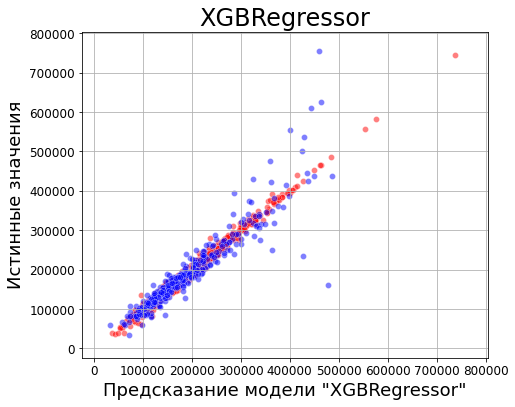

In [78]:
%%time
model_name = 'XGBRegressor'
model = XGBRegressor(colsample_bytree=0.5, learning_rate=0.1,
                     max_depth=3, min_child_weight=1.8,
                     n_estimators=380, random_state=7)
model.fit(X_train, y_train)
models[model_name] = model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print_metrics(y_test, y_test_pred)
plot_y_true_vs_y_pred(y_train, y_test, y_train_pred, y_test_pred, model_name)
write_prediction(model, model_name)

### CatBoost

R^2 0.8690760051019315
RMSE 34328.80144453161
MSE 1178466608.6180756
MAE 17264.552245200994
CPU times: user 1.03 s, sys: 852 ms, total: 1.88 s
Wall time: 921 ms


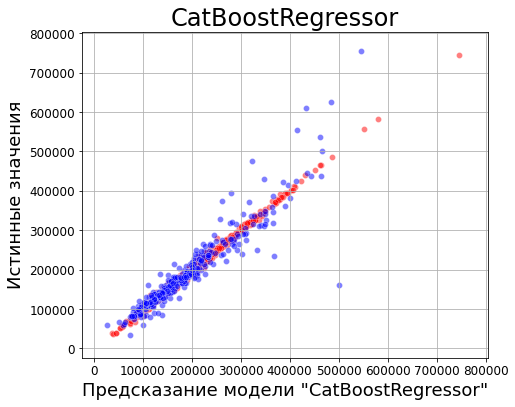

In [79]:
%%time
model_name = 'CatBoostRegressor'
model = CatBoostRegressor(colsample_bylevel=0.05, reg_lambda=0.05,
                          max_depth=3, learning_rate=0.1,
                          n_estimators=1700, random_state=7)
model.fit(X_train, y_train, verbose=0)
models[model_name] = model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print_metrics(y_test, y_test_pred)
plot_y_true_vs_y_pred(y_train, y_test, y_train_pred, y_test_pred, model_name)
write_prediction(model, model_name)

### LightGBM

R^2 0.8806336784965773
RMSE 32778.563858495814
MSE 1074434248.625488
MAE 18204.636242507157
CPU times: user 1.37 s, sys: 419 ms, total: 1.79 s
Wall time: 329 ms


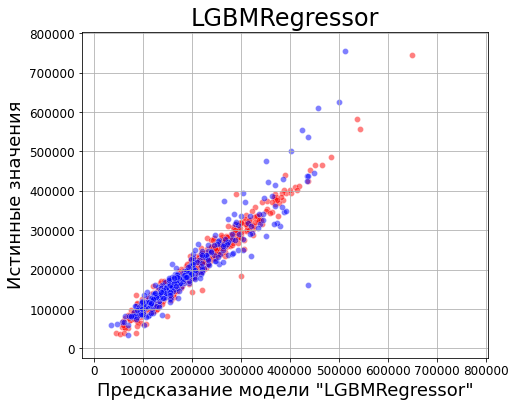

In [80]:
%%time
model_name = 'LGBMRegressor'
model = LGBMRegressor(num_leaves=5, learning_rate=0.1, n_estimators=300,
                      max_bin=55, bagging_fraction=0.8, max_depth=9,
                      bagging_freq=5, feature_fraction=0.2319, bagging_seed=9,
                      min_data_in_leaf=6, min_sum_hessian_in_leaf=11)
model.fit(X_train, y_train)
models[model_name] = model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print_metrics(y_test, y_test_pred)
plot_y_true_vs_y_pred(y_train, y_test, y_train_pred, y_test_pred, model_name)
write_prediction(model, model_name)